In [19]:
from ThesisFunctions import *

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Testing out newton method
No minima found, performing grid search.
Minimum found at the edge for (0.0, 2.2699130413237594), likely no minimum exists.
Testing out newton method
No minima found, performing grid search.
Minimum found at the edge for (1.69533490842676, -1.6871450883795132), likely no minimum exists.
Minimum found at the edge for (-26.198974609375, 2.3111823931908386), likely no minimum exists.
0.8
Testing out newton method
No minima found, performing grid search.
Minimum found at the edge for (-0.0472252562310639, -1.7372512358626366), likely no minimum exists.
Testing out newton method
No minima found, performing grid search.
Testing out newton method
No minima found, performing grid search.
Minimum found at the edge for (1.85335028008803e-18, -4.419678630118964), likely no minimum exists.
Testing out newton method
No minima found, performing grid search.
Minimum found at the edge for (6.93889390390723e-17, -1.94266672069983

ValueError: Failed to find all positive roots after specified attempts.

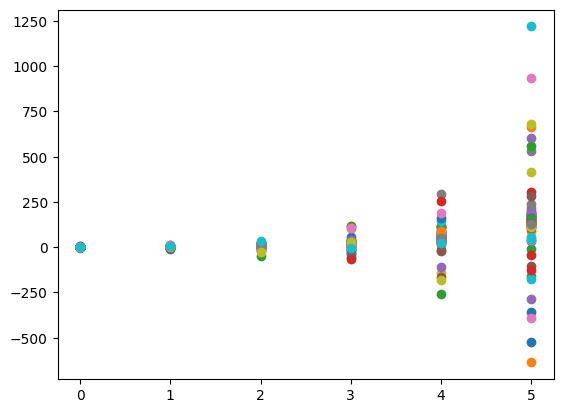

In [20]:
# Define the range of noise levels to analyze.
noise_levels = [0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 1, 1.2, 1.5, 2, 3, 4, 10, 20, 30, 50]
#noise_levels = [0.1]
# Set the number of data points for each generated dataset.
num_datapoints = 6

# Initialize a list to store the results for each noise level.
results_list = []
num_minimas = 1
data = 0

for level in noise_levels:
    num_minimas_list = []  # List to store the number of minima found in each iteration for current noise level.

    for _ in range(10):  # Perform the analysis n times to average out the stochastic effects of noise.
        
        # Generate  data.
        data = data_gen(num_datapoints, level, 1, 1)
        x_i = np.array(data['Data'].values)
        t_i = np.array(data['Time'].values)
        plt.scatter(t_i, x_i)
        
        # Compute the Groebner basis.
        B = groeb(x_i, t_i)
                        
        # Identify positive real roots.
        positive_roots_b = roots_symbolic(B[1])
        
        # Find corresponding (x0, alpha) pairs.
        params = find_x0_alpha_pairs(B, positive_roots_b)
        
        # Evaluate the Hessian at each (x0, alpha) pair.
        maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)

        # Count the number of minima.
        num_minimas = sum(1 for _, is_true in maxima_checks if is_true)
        if num_minimas == 0:
            print("Testing out newton method")
            positive_roots_b = find_roots_alternative(B[1])
            params = find_x0_alpha_pairs(B, positive_roots_b)
            maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
            num_minimas = sum(1 for _, is_true in maxima_checks if is_true)
            if num_minimas == 0: 
                print("No minima found, performing grid search.")
                for param in params:
                    best_params, is_edge = grid_search_around_extrema(param, data)
                    best_params2, is_edge2 = grid_search_around_extrema((0,0), data)
                    if not is_edge or not is_edge2:
                        #print(f"Found a minimum inside the grid at {best_params}.")
                        num_minimas = 1
                    else:
                        pass
                        print(f"Minimum found at the edge for {param}, likely no minimum exists.")
                        # Handle the edge case, possibly by ignoring or taking special note
                        #plot(data)
        
        
        num_minimas_list.append(num_minimas)
        
        
    # Calculate average and standard deviation of minima count for the current noise level.
    max_num_minimas = np.max(num_minimas_list)
    avg_num_minimas = np.mean(num_minimas_list)
    std_num_minimas = np.std(num_minimas_list)
    print(avg_num_minimas)
    
    #print(f'Noise Level={level}: Mean of positive roots = {avg_num_minimas}, Std Dev = {std_num_minimas}, Max = {max_num_minimas}')

    # Append the results for the current noise level to the results list.
    results_list.append({
        'Noise_Level': level,
        'Average_Minimas': avg_num_minimas,
        'STD_Minimas': std_num_minimas,
        'Max_Minimas': max_num_minimas,
    })

# Convert the results list into a DataFrame.
results_df = pd.DataFrame(results_list)

# Display the DataFrame.
print(results_df)


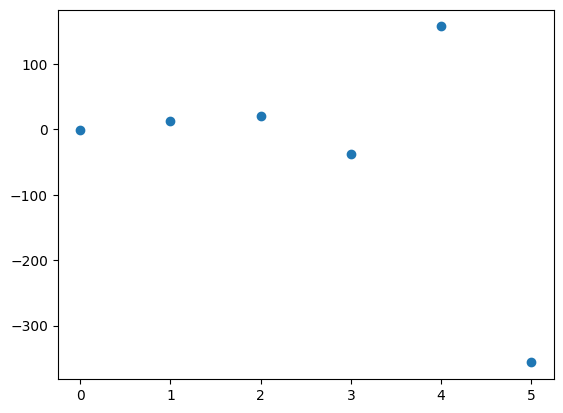

In [15]:
data = data_gen(6, 20, 1, 1)
x_i = np.array(data['Data'].values)
t_i = np.array(data['Time'].values)
plt.scatter(t_i, x_i)